# SETTING UP

### Import libraries

In [1]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16) 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler #to scale data 
import warnings
import logging

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.6.4


### Set seed for reproducibility

In [2]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

### Suppress warnings

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)
tf.get_logger().setLevel('INFO')
tf.autograph.set_verbosity(0)

tf.get_logger().setLevel(logging.ERROR)
tf.get_logger().setLevel('ERROR')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

### Importing data

In [4]:
dataset_dir = '/kaggle/input/training-datasethomework2/training_dataset_homework2'

In [5]:
X_train = np.load(os.path.join(dataset_dir,'x_train.npy'))
Y_train = np.load(os.path.join(dataset_dir,'y_train.npy'))

In [6]:
classes_dict = {0: "Wish",
          1: "Another",
          2: "Comfortably",
          3: "Money",
          4: "Breathe",
          5: "Time",
          6: "Brain",
          7: "Echoes",
          8: "Wearing",
          9: "Sorrow",
          10: "Hey", 
          11: "Shine"
          }

classes_labels = list(classes_dict.values())

In [7]:
feat_dict = {0: 'FEAT_1',
               1: 'FEAT_2',
               2: 'FEAT_3',
               3: 'FEAT_4',
               4: 'FEAT_5',
               5: 'FEAT_6'}

feat_labels = list(feat_dict.values())

### Splitting data

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, 
                                                  test_size = 0.2, 
                                                  random_state = seed,
                                                  stratify = Y_train)

y_train = tfk.utils.to_categorical(y_train)
y_val = tfk.utils.to_categorical(y_val)

print('Shapes:')
print('x_train: ', x_train.shape)
print('x_val: ', x_val.shape)
print('y_train: ', y_train.shape)
print('y_val: ', y_val.shape)

Shapes:
x_train:  (1943, 36, 6)
x_val:  (486, 36, 6)
y_train:  (1943, 12)
y_val:  (486, 12)


# DATA PREPROCESSING

In [9]:
#to check the result of different preprocessing routines
from matplotlib.lines import Line2D


def inspect_multivariate(X, Y, columns,ts_labels, idx=None):
    if(idx==None):
        idx=np.random.randint(0,len(X))

    print('The class of this time series is ' + ts_labels[np.argmax(Y[idx,:])])
        
    figs, axs = plt.subplots(len(columns), 1, sharex=True, figsize=(30,30))
    for i, col in enumerate(columns):
        #np.arange(len(X[0,:,i])) --> returns an array of numbers from 1 to 36
        #X[idx,:,i] --> returns the curve with respect to feature i of a time series samplem from random index idx
        axs[i].plot(np.arange(len(X[0,:,i])), X[idx,:,i],marker=Line2D.filled_markers[0])
        axs[i].set_title(col)
    
    plt.show()

The class of this time series is Money


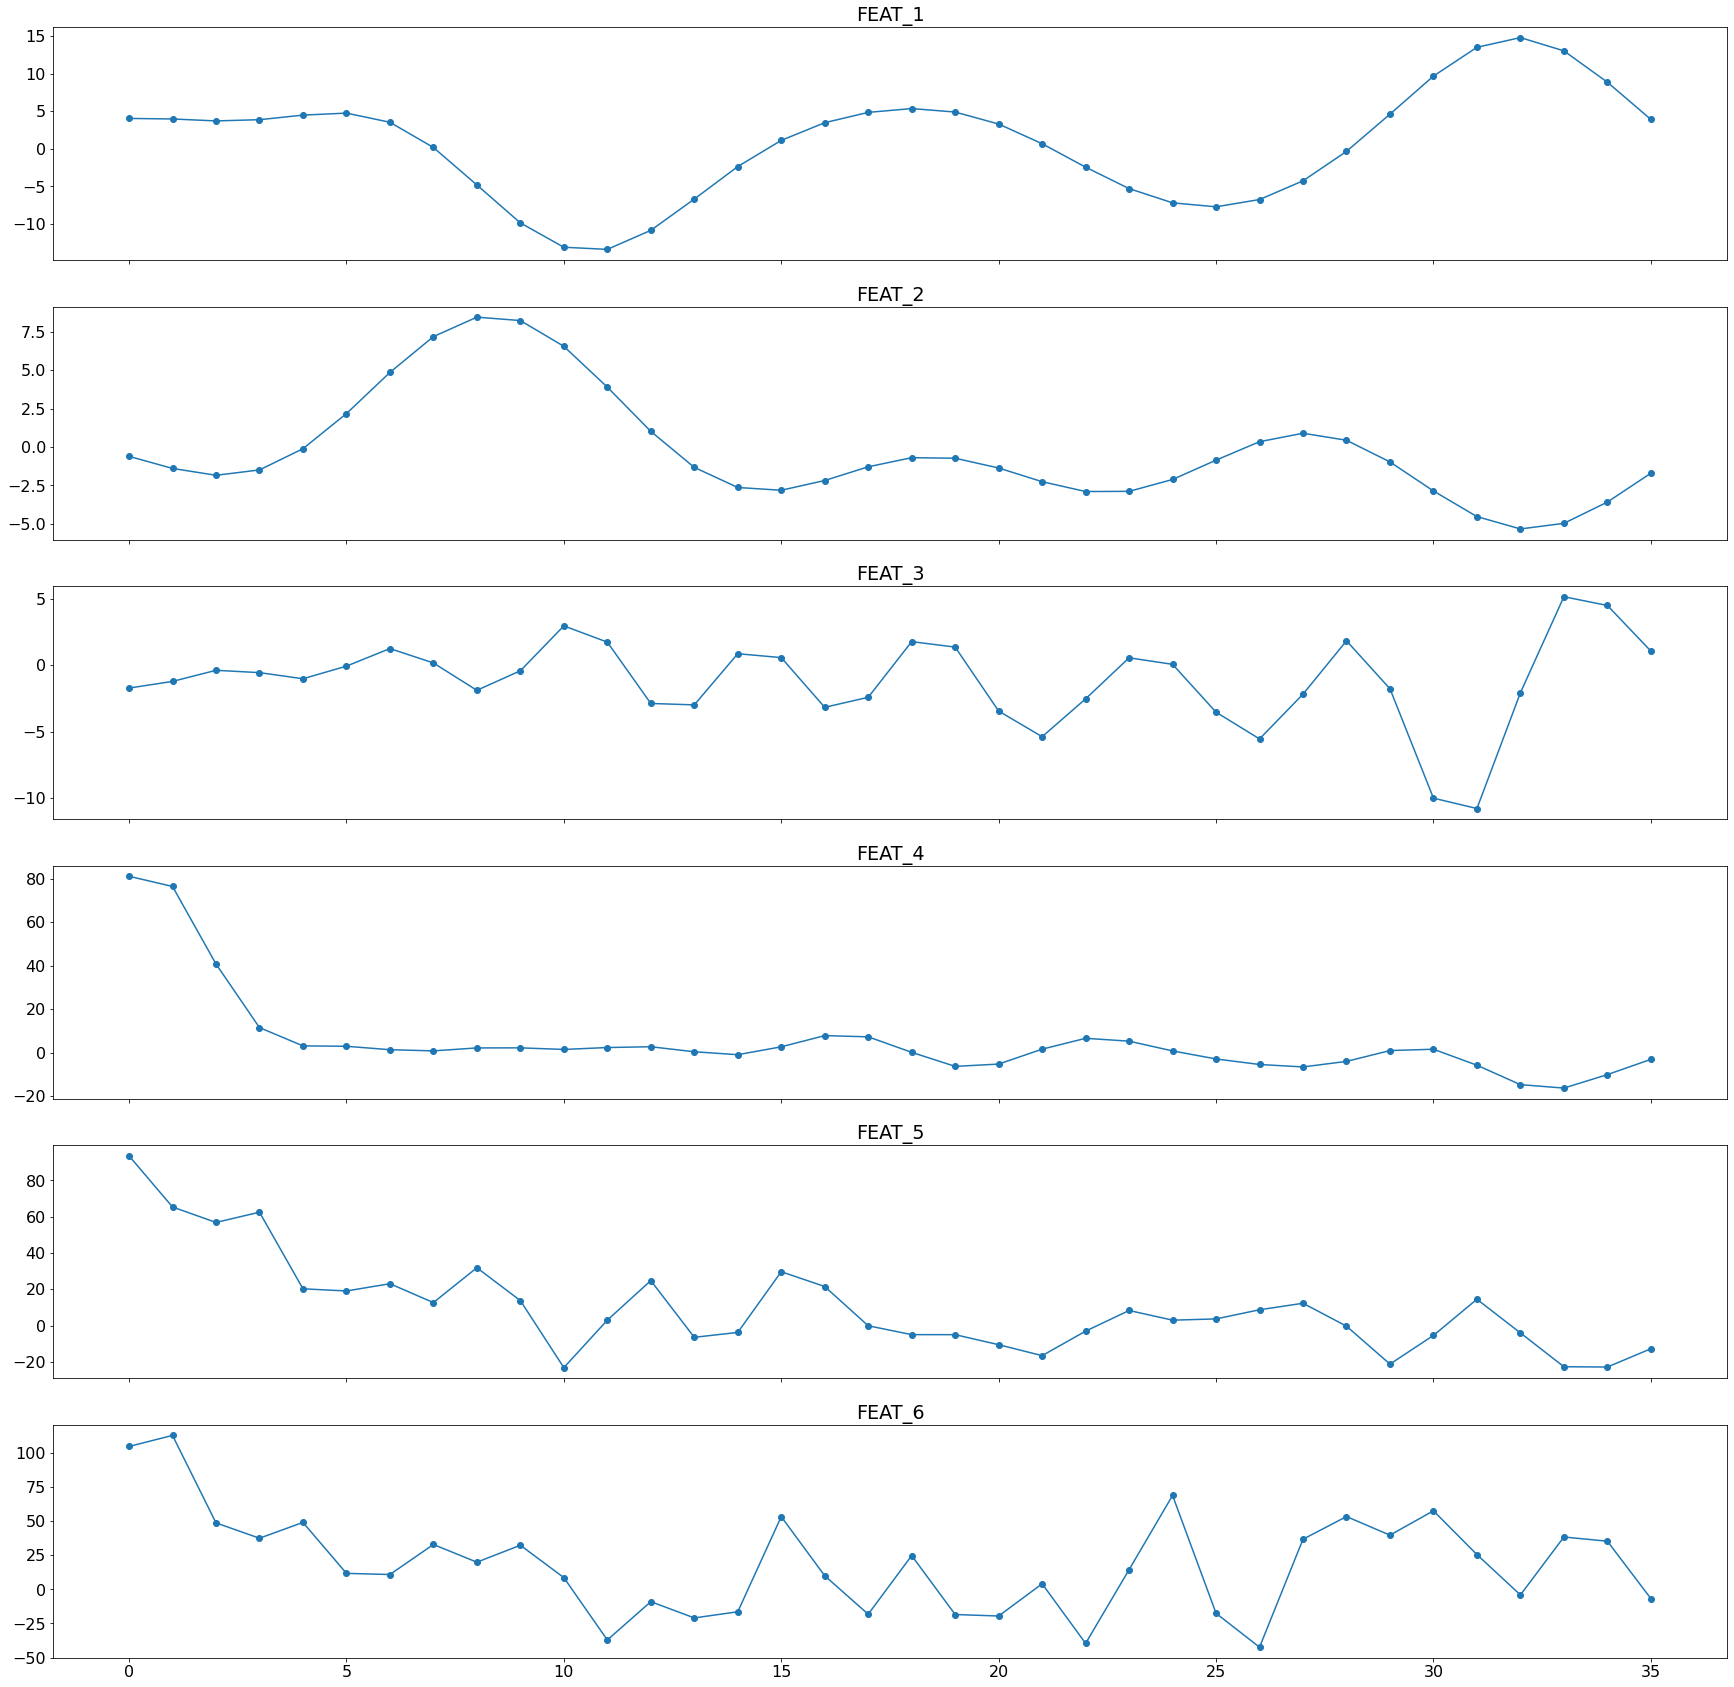

In [10]:
#NO PREPROCESSING OF DATA

#sample the timeseries 15
inspect_multivariate(x_train, y_train, feat_labels, classes_labels,15)

### (1) Normalize/standardize each feature along time_steps 

In [11]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

scalers = []

x_train_new= np.empty(x_train.shape)
x_val_new= np.empty(x_val.shape)

for i in range(x_train.shape[1]):
    scaler = RobustScaler(unit_variance=True) #could be replaced by MinMaxScaler or others
    scaler = scaler.fit(x_train[:,i,:])
    #add the scaler to the list of scalers of each sample point
    scalers.append(scaler)
    
    x_train_new[:,i,:] = scaler.transform(x_train[:,i,:])
    x_val_new[:,i,:] = scaler.transform(x_val[:,i,:])
    
print('Output shape:')
x_train_new.shape, x_val_new.shape

Output shape:


((1943, 36, 6), (486, 36, 6))

The class of this time series is Money


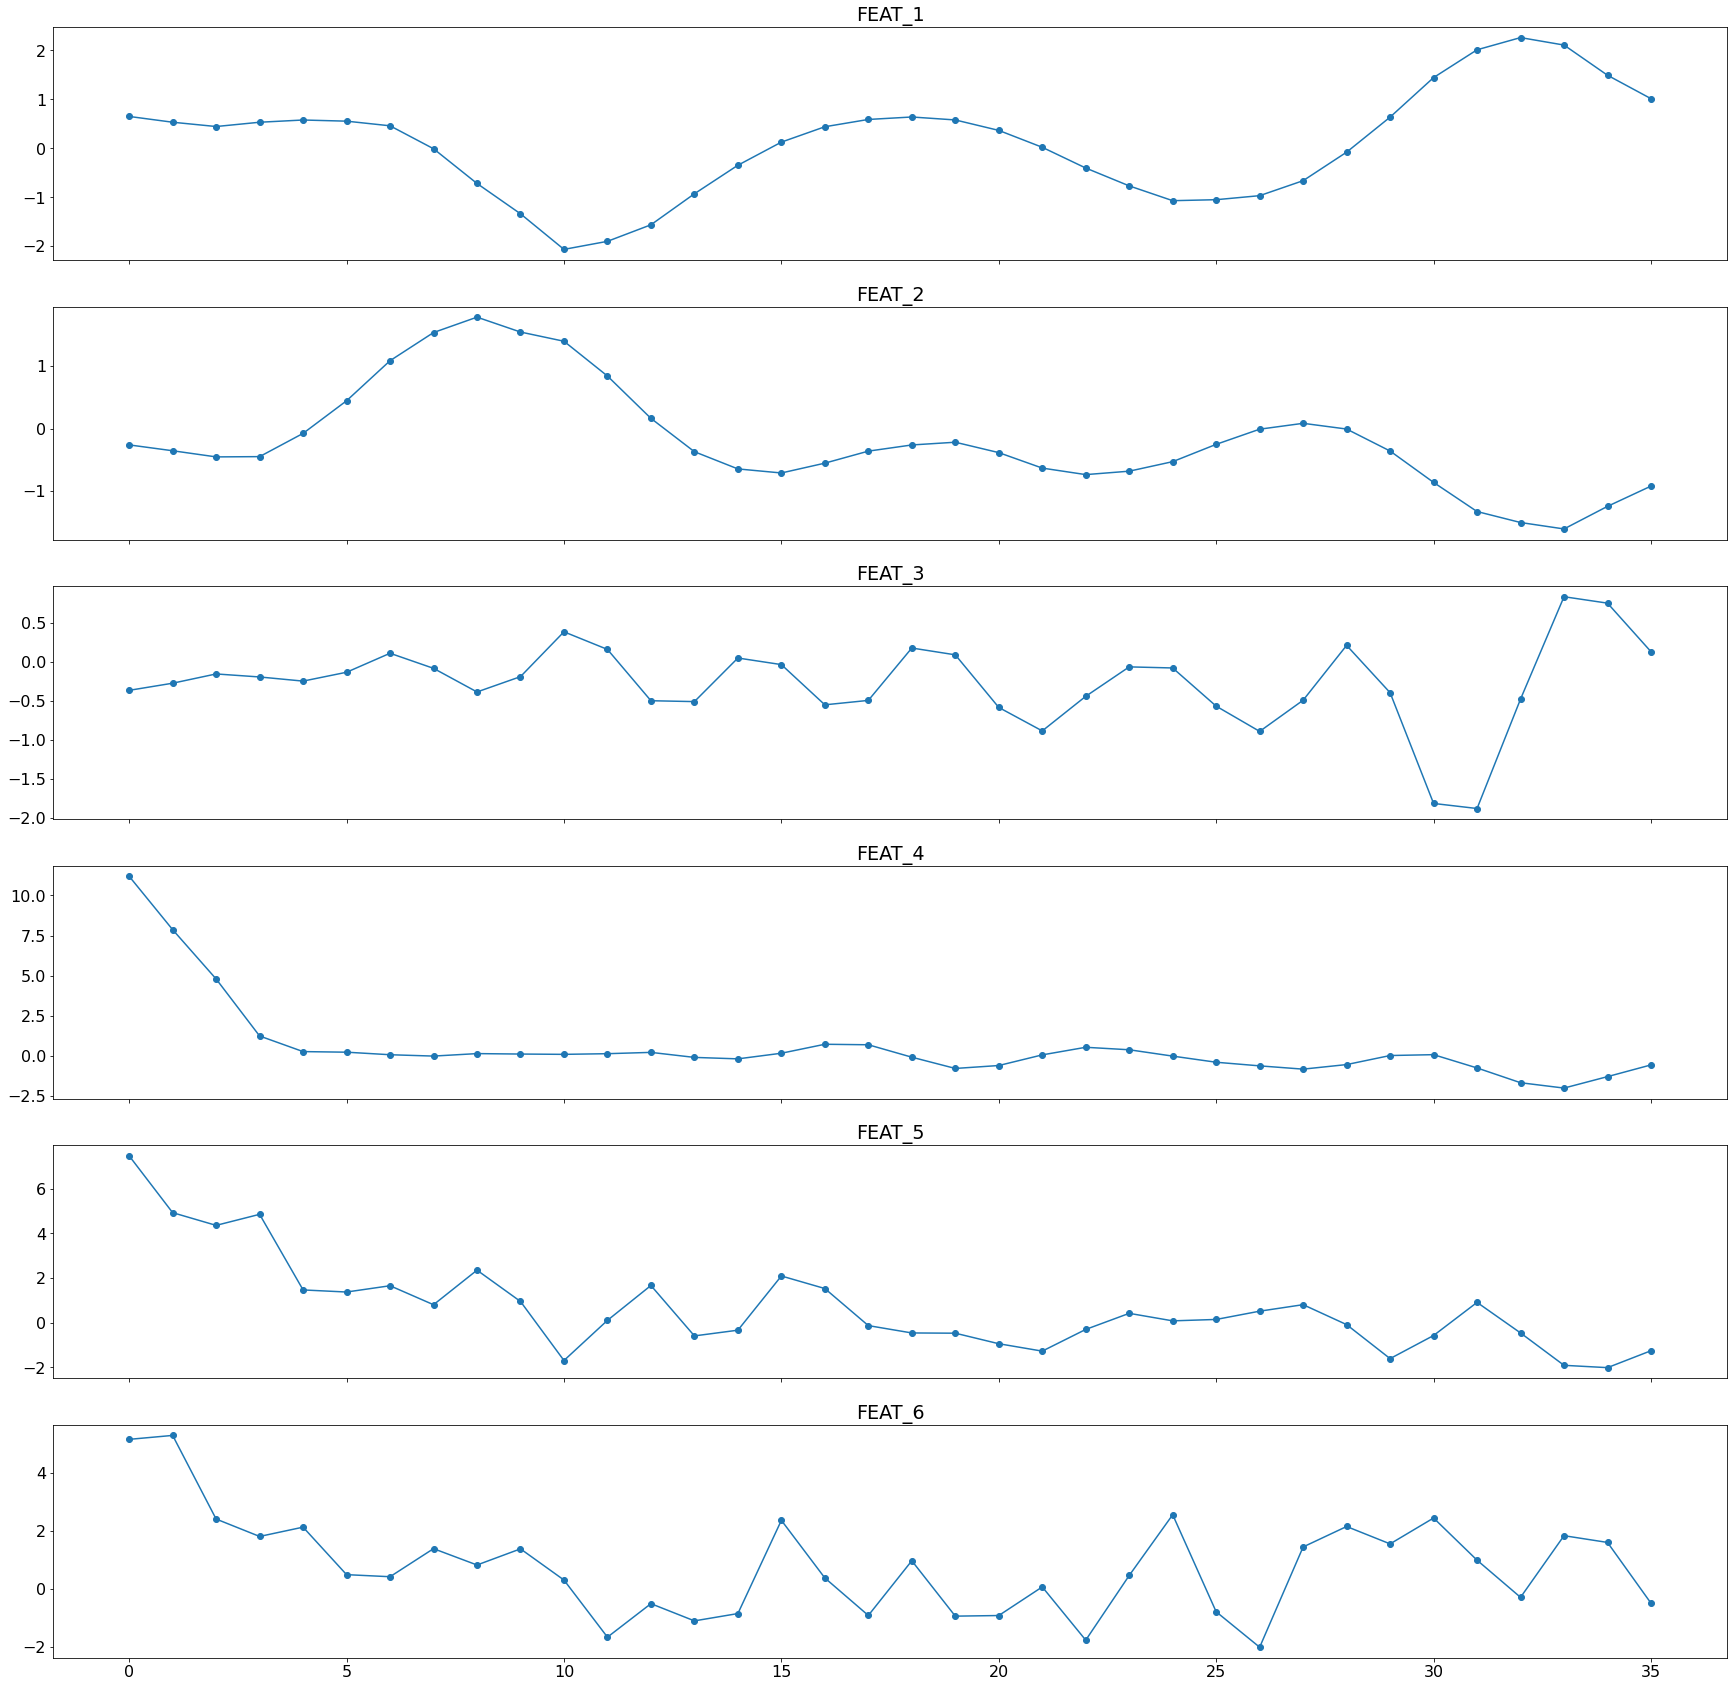

In [12]:
#checking results
inspect_multivariate(x_train_new, y_train,feat_labels, classes_labels,15)

### (2) Reshaping: scaling along features

In [13]:
#scaling along features
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

scaler = RobustScaler() #could be replaced

x_train_new = scaler.fit_transform(x_train.reshape(-1, x_train.shape[-1])).reshape(x_train.shape)
x_val_new = scaler.transform(x_val.reshape(-1, x_val.shape[-1])).reshape(x_val.shape)

print('Output shape:')
x_train_new.shape, x_val_new.shape

Output shape:


((1943, 36, 6), (486, 36, 6))

In [14]:
# ROUTINE TO SAVE SCALERS
#saving the scaler
#import joblib

#scaler_filename = "scaler_along_feat"
#joblib.dump(scaler, scaler_filename)

The class of this time series is Money


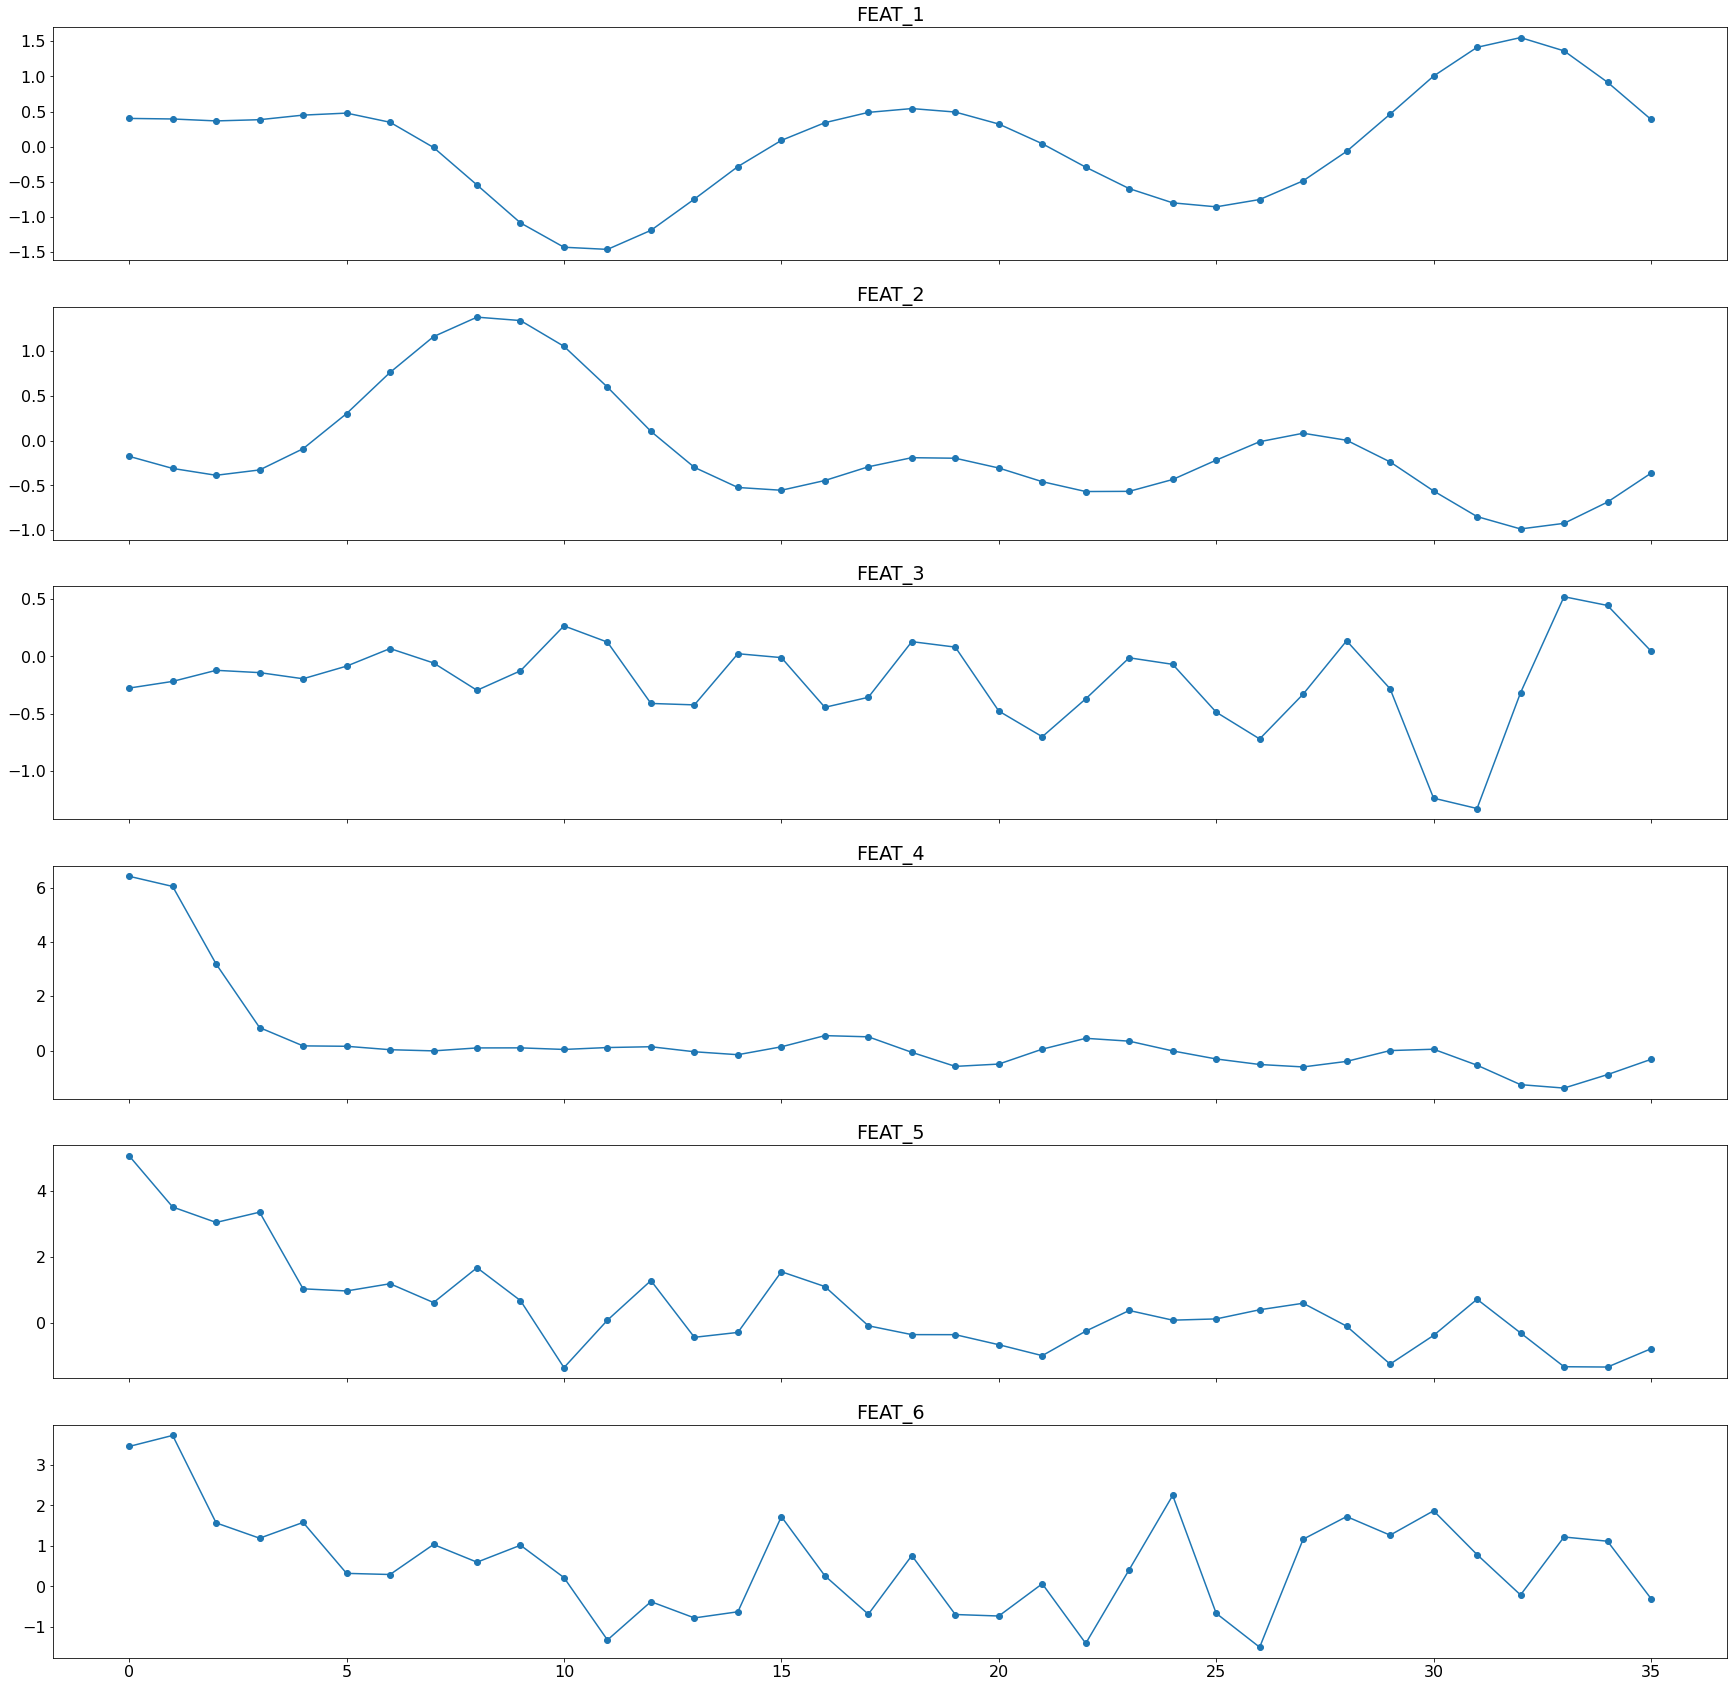

In [15]:
#checking results
inspect_multivariate(x_train_new, y_train,feat_labels, classes_labels,15)

### (3) Reshaping: scaling along timesteps

In [16]:
#scaling along timesteps
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

scaler = RobustScaler(unit_variance=True) #could be replaced by MinMaxScaler

x_train_new = scaler.fit_transform(x_train.reshape(-2, x_train.shape[-2])).reshape(x_train.shape)
x_val_new = scaler.transform(x_val.reshape(-2, x_val.shape[-2])).reshape(x_val.shape)

print('Output shape:')
x_train_new.shape, x_val_new.shape

Output shape:


((1943, 36, 6), (486, 36, 6))

The class of this time series is Money


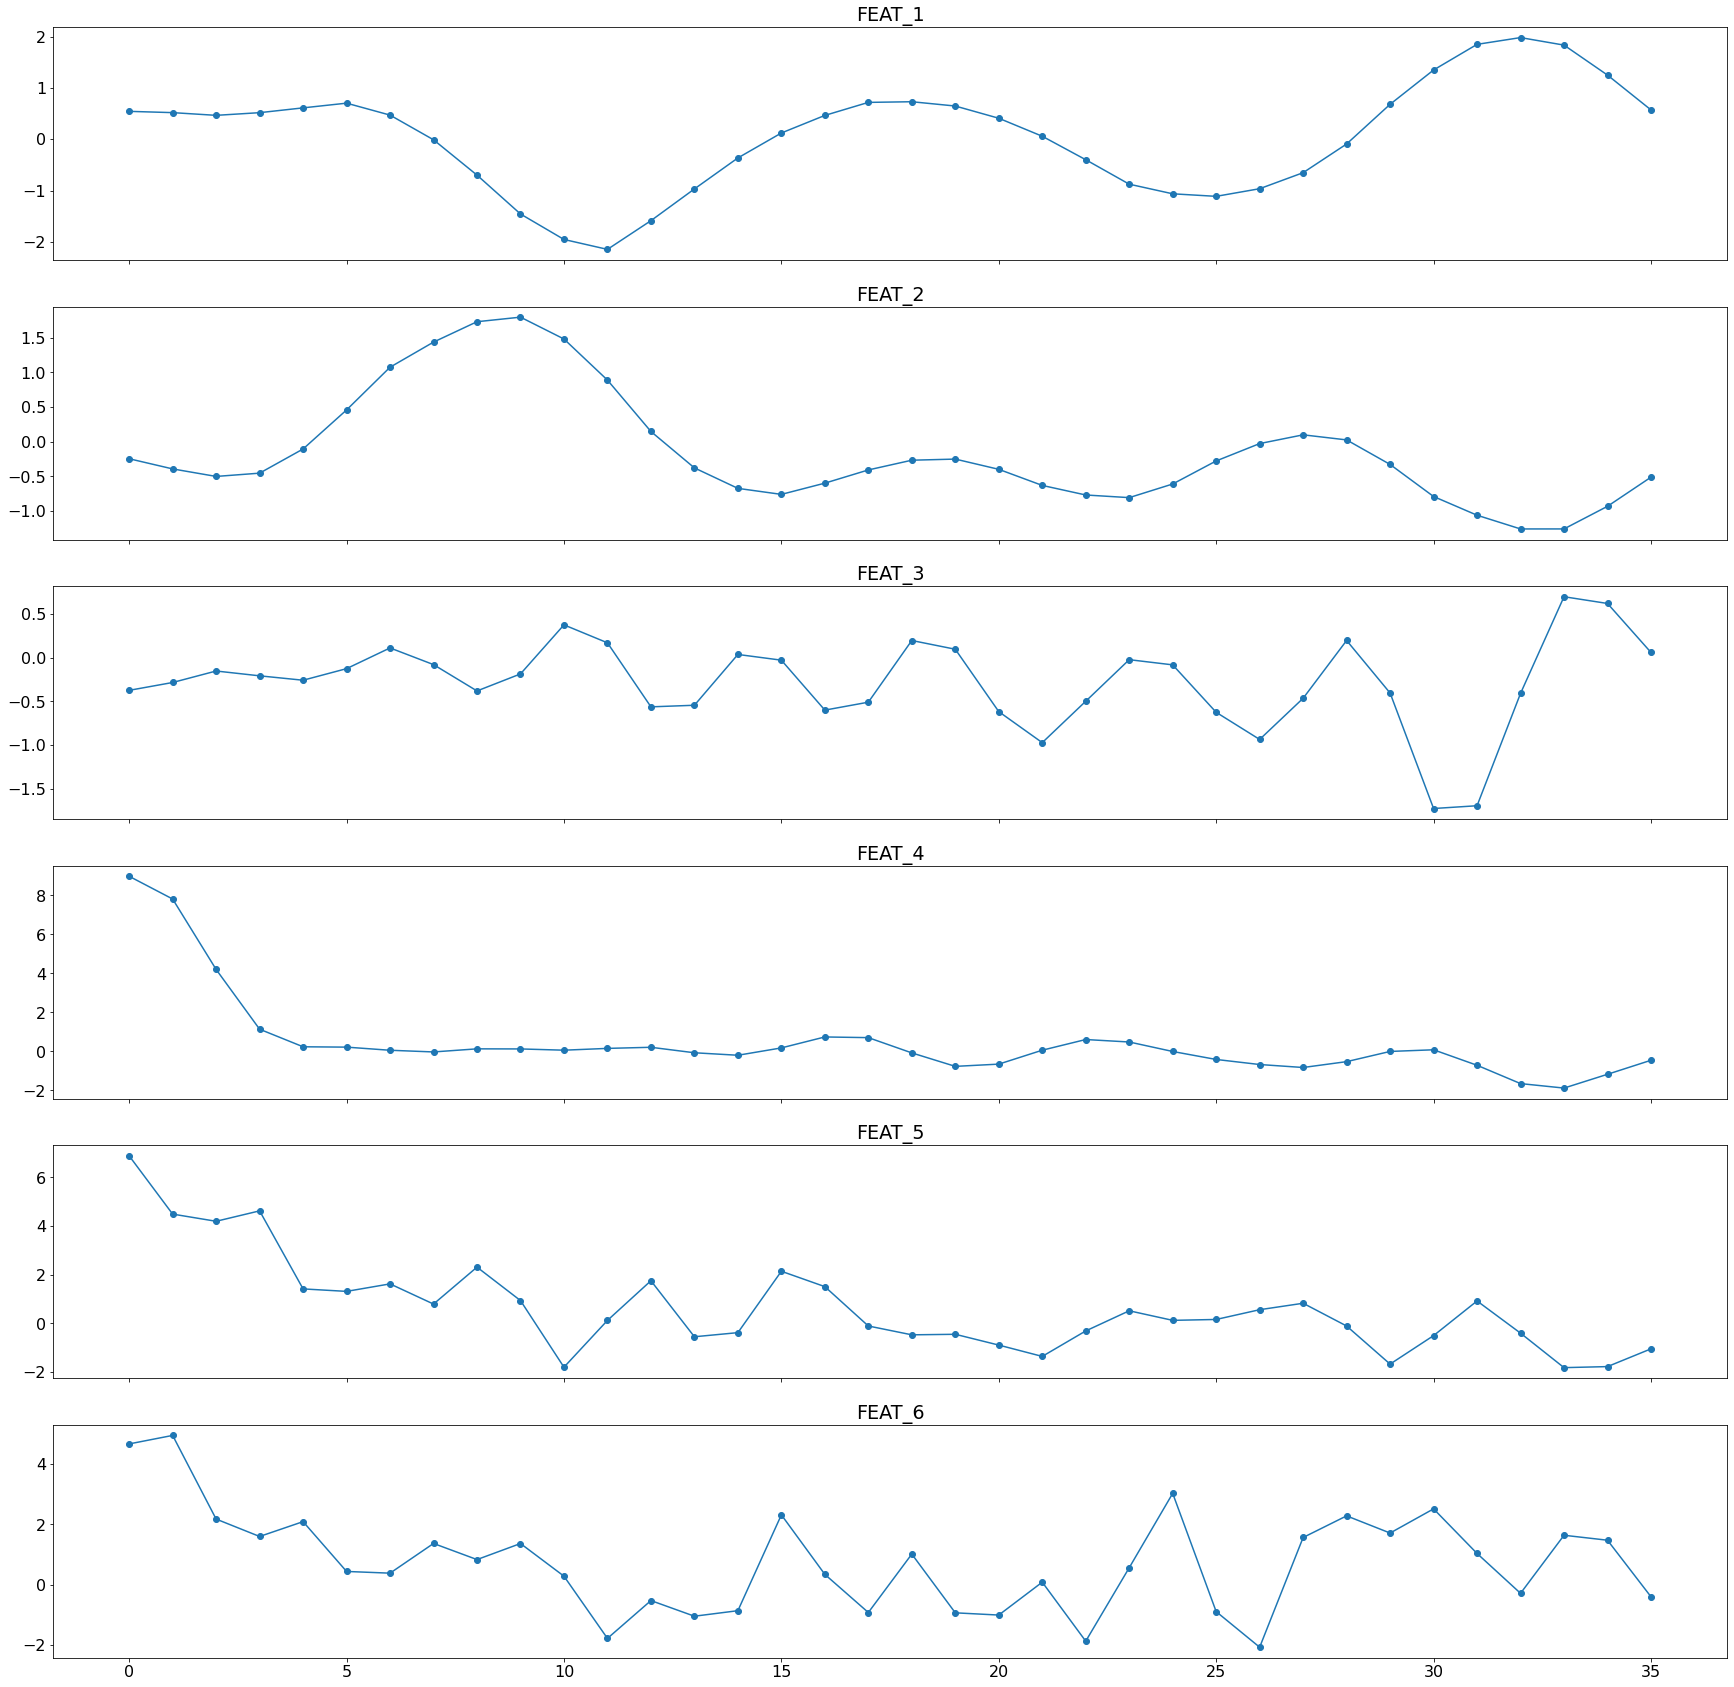

In [17]:
#checking results
inspect_multivariate(x_train_new, y_train,feat_labels, classes_labels,15)

# FINAL GRAPHS

The class of this time series is Money


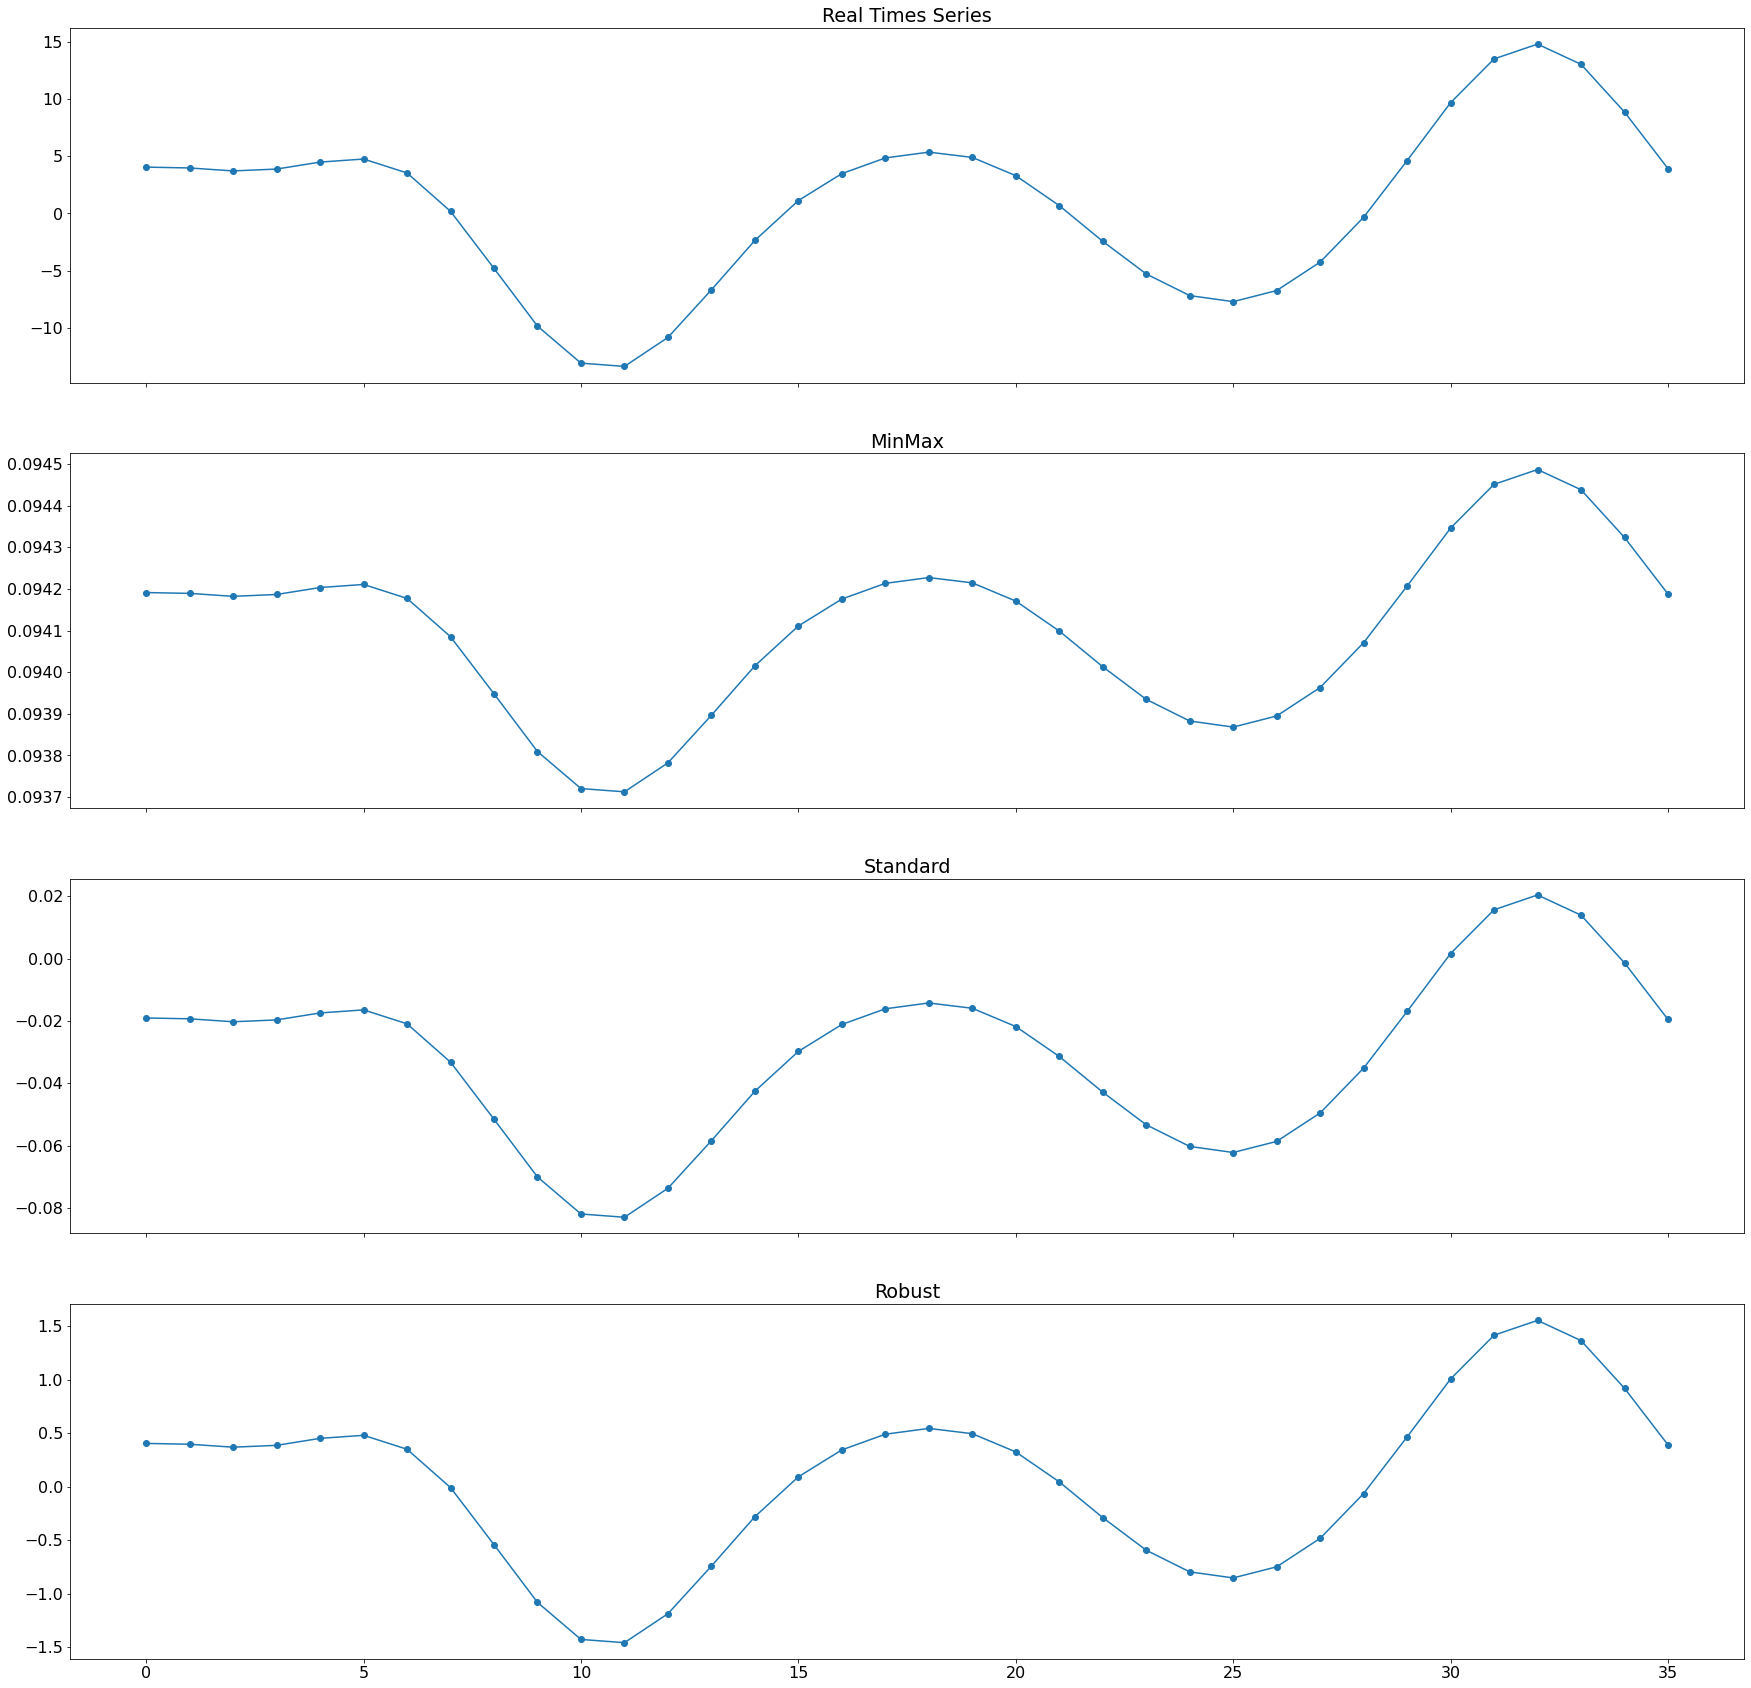

In [18]:
#plot graph to show why robust scaler works
from matplotlib.lines import Line2D
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

idx = 15

print('The class of this time series is ' + classes_labels[np.argmax(y_train[idx,:])])

scaling_routines = ['Real Times Series', 'MinMax', 'Standard', 'Robust']

figs, axs = plt.subplots(len(scaling_routines), 1, sharex=True, figsize=(30,30))
for i, sclr in enumerate(scaling_routines):
    #np.arange(len(X[0,:,i])) --> returns an array of numbers from 1 to 36
    #X[idx,:,i] --> returns the curve with respect to feature i of a time series samplem from random index idx
    if(sclr == 'Real Times Series'):
        x_train_new = x_train
        x_val_new = x_val

    if(sclr == 'MinMax'):
        scaler = MinMaxScaler() 
        x_train_new = scaler.fit_transform(x_train.reshape(-1, x_train.shape[-1])).reshape(x_train.shape)
        x_val_new = scaler.transform(x_val.reshape(-1, x_val.shape[-1])).reshape(x_val.shape)
        
    if(sclr == 'Standard'):
        scaler = StandardScaler() 
        x_train_new = scaler.fit_transform(x_train.reshape(-1, x_train.shape[-1])).reshape(x_train.shape)
        x_val_new = scaler.transform(x_val.reshape(-1, x_val.shape[-1])).reshape(x_val.shape)
        
    if(sclr == 'Robust'):
        scaler = RobustScaler() 
        x_train_new = scaler.fit_transform(x_train.reshape(-1, x_train.shape[-1])).reshape(x_train.shape)
        x_val_new = scaler.transform(x_val.reshape(-1, x_val.shape[-1])).reshape(x_val.shape)
    
    #we analyze only feature 1 to make a point
    axs[i].plot(np.arange(len(x_train_new[0,:,i])), x_train_new[idx,:,0],marker=Line2D.filled_markers[0])
    axs[i].set_title(sclr)

plt.show()

The class of this time series is Money


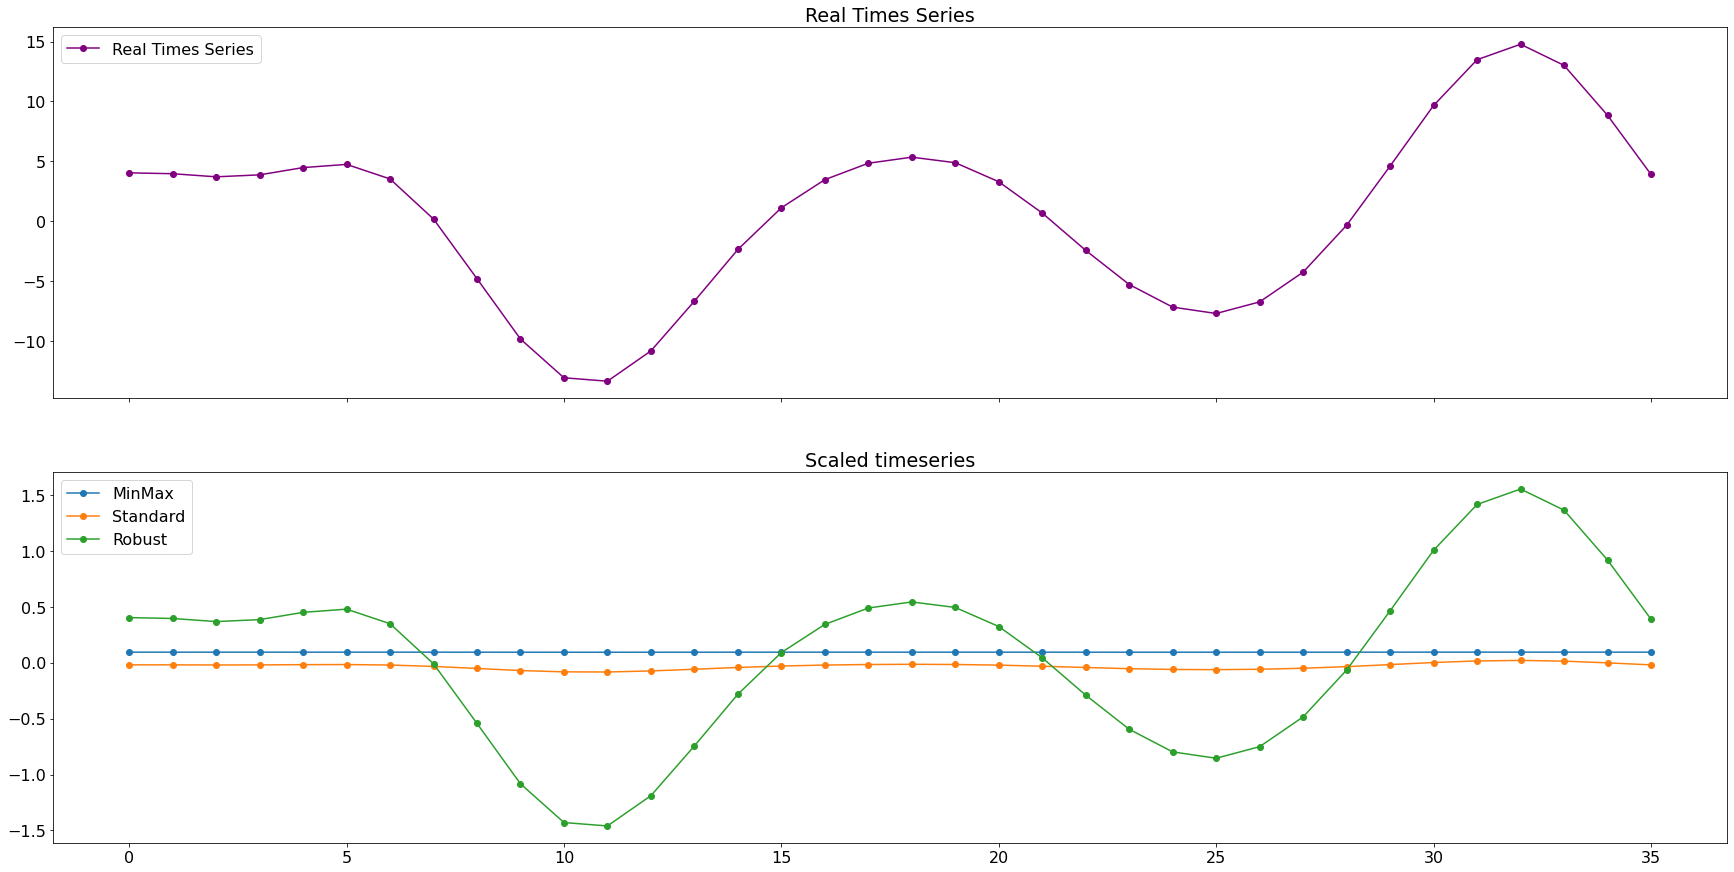

In [41]:
#plot graph to show why robust scaler works
from matplotlib.lines import Line2D
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

idx = 15

print('The class of this time series is ' + classes_labels[np.argmax(y_train[idx,:])])

scaling_routines = ['MinMax', 'Standard', 'Robust']

figs, axs = plt.subplots(2, 1, sharex=True, figsize=(30,15))

    #np.arange(len(X[0,:,i])) --> returns an array of numbers from 1 to 36
    #X[idx,:,i] --> returns the curve with respect to feature i of a time series samplem from random index idx
    
x_all = []

scaler = MinMaxScaler() 
x_train_MinMax = scaler.fit_transform(x_train.reshape(-1, x_train.shape[-1])).reshape(x_train.shape)
x_all.append(x_train_MinMax)

scaler = StandardScaler() 
x_train_Standard = scaler.fit_transform(x_train.reshape(-1, x_train.shape[-1])).reshape(x_train.shape)
x_all.append(x_train_Standard)

scaler = RobustScaler() 
x_train_Robust = scaler.fit_transform(x_train.reshape(-1, x_train.shape[-1])).reshape(x_train.shape)
x_all.append(x_train_Robust)


x_all = np.array(x_all)



axs[0].plot(np.arange(len(x_train[0,:,i])), x_train[idx,:,0],marker=Line2D.filled_markers[0],label = 'Real Times Series', color='purple')
axs[0].set_title('Real Times Series')
axs[0].legend()


for i, sclr in enumerate(scaling_routines):
    axs[1].plot(np.arange(len(x_train[0,:,i])), x_all[i,idx,:,0],marker=Line2D.filled_markers[0],label = sclr)
    axs[1].set_title('Scaled timeseries')
    axs[1].legend()

plt.show()
